# Analyze model results for the Baden & Schinznach springs

Temperature main springs (Sonney & Vautaz 2008, Geothermics 37): 
Baden: 47.0 degr. C
Schinznach: 30 degr. C

In [25]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

## Read model results:

In [26]:
fn = 'data/model_params_and_results_baden_final.csv'
     
df = pd.read_csv(fn)

## make a figure of spring temperature over time:

In [27]:
model_run_labels = [['depth=5 km', 'depth=9 km', 'angle=50 degrees'], 
                    ['width=20 m', 'width=40 m', r'ra=50 $s m^{-1}$', r'ra=110 $s m^{-1}$']]

base_label = r'base case'

lss = ['-', '-', '-', '-']



1 depth=5 km
2 depth=9 km
3 angle=50 degrees
4 width=20 m
5 width=40 m
6 ra=50 $s m^{-1}$
7 ra=110 $s m^{-1}$


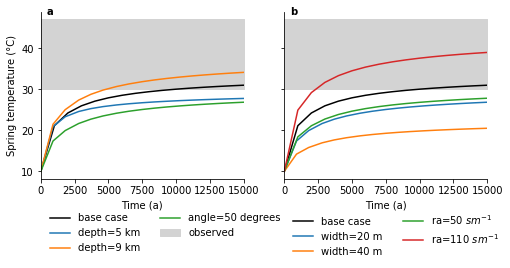

In [28]:
degree_symbol = chr(176)

fig, axs = pl.subplots(1, 2, figsize=(8, 4), sharey=True)

ys1 = np.array([30, 30])
ys2 = np.array([47, 47])

model_runs = np.unique(df['model_run'])

xs = np.array([0, df['runtime_yr'].max()])

run_count = 1

for ax, labels in zip(axs, model_run_labels):
    
    if ax == axs[0]:
        ax.fill_between(xs, ys1, ys2, color='lightgrey', label='observed')
    else:
        ax.fill_between(xs, ys1, ys2, color='lightgrey')
        
    # show base case
    ind = df['model_run'] == 0
    
    x = df.loc[ind, 'runtime_yr'].values
    y = df.loc[ind, 'max_surface_temperature'].values
    #print (list(zip(x, y)))
    ax.plot(x, y, color='black', label=base_label, ls='-')    
    
    # show model runs    
    for i, label in enumerate(labels):
        
        print(run_count, label)

        ind = df['model_run'] == run_count
        x = df.loc[ind, 'runtime_yr'].values
        y = df.loc[ind, 'max_surface_temperature'].values
        #print (list(zip(x, y)))
        ax.plot(x, y, label=label, ls=lss[i])
        
        run_count += 1

    ax.set_xlim(0, df['runtime_yr'].max())

#for ax in axs:
#    ax.set_xlim(0, 10000)

axs[0].set_ylabel('Spring temperature (%sC)' % degree_symbol)
for ax in axs:
    ax.set_xlabel('Time (a)')
        
axs[0].legend(loc='upper left', frameon=False, ncol=2, bbox_to_anchor=(0.0, -0.15))
axs[1].legend(loc='upper left', frameon=False, ncol=2, bbox_to_anchor=(0.0, -0.15))

for i, panel in enumerate(axs):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, 
               ha='left', va='top', fontsize='medium')

fig.subplots_adjust(bottom=0.3)
#fig.tight_layout()

fig.savefig('fig/modeled_T_Baden_sensitivity.pdf')

**Fig caption** *Modeled spring temperatures over time and sensitivity of spring temperatures to the geometry of the fluid conduit and the heat flux at the land surface. The observed present-day temperatures in the springs range from 30 to 47 degr. C (Sonney & Vautaz, 2008)*

## Low-temperature thermochronology



In [29]:
#fns = ['data/model_params_and_results_2_runs_baden_30-11-2018_low_exhumation.csv',
#      'data/model_params_and_results_1_runs_baden_1-12-2018_high_exhumation.csv']
fns = ['data/model_params_and_results_baden_highexh.csv']
dfs = [pd.read_csv(fn) for fn in fns]

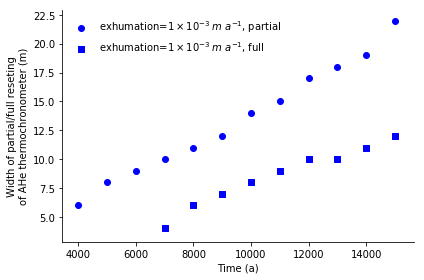

In [30]:
fig, ax = pl.subplots(1, 1)

colors = ['blue', 'orange']

markers = ['o', 's']

labels = [r'exhumation=$1 \times 10^{-3} \; m \; a^{-1}$']

for i, df in enumerate(dfs):
    
    label1 = labels[i] + ', partial'
    label2 = labels[i] + ', full'
    
    df['width_partial'] =  df['x_max_partial_reset_surface'] - df['x_min_partial_reset_surface']
    df['width_full'] = df['x_max_full_reset_surface'] - df['x_min_full_reset_surface']
    
    #ax.plot(df['runtime_yr'], df['width_partial'], ls='--', color=colors[i], label=label1)
    #ax.plot(df['runtime_yr'], df['width_full'], ls='-', color=colors[i], label=label2)
    ax.scatter(df['runtime_yr'], df['width_partial'], color=colors[i], marker=markers[0], label=label1)
    ax.scatter(df['runtime_yr'], df['width_full'], color=colors[i], marker=markers[1], label=label2)

    
ax.legend(frameon=False, loc='upper left', ncol=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ylabel = 'Width of partial/full reseting\nof AHe thermochronometer (m)'
ax.set_ylabel(ylabel)
ax.set_xlabel('Time (a)')

fig.tight_layout()
    
fig.savefig('fig/modeled_AHe_resetting.pdf')

**Fig caption** *Modeled width of the zone around the thermal springs near Baden and Schinznach where the AHe thermochronometer is partially or fully reset.*